<a href="https://colab.research.google.com/github/kidujm/data_class/blob/main/0212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
book = pd.read_csv('도서랭킹(한글컬럼)2025_정제완료.csv')
book

In [3]:
book['키워드']

,키워드
0,"[""저항"", ""증언"", ""폭력"", ""기억"", ""연대""]"
1,"[""로맨스"", ""사랑"", ""이별"", ""가족"", ""상처""]"
2,"[""가족"", ""이별"", ""시간"", ""기억""]"
3,"[""성장"", ""사랑"", ""인간관계"", ""가족"", ""상실""]"
4,"[""사랑"", ""금지"", ""욕망"", ""성장"", ""성찰""]"
...,...
3681,"[""판타지"", ""모험"", ""우정"", ""성장"", ""마법""]"
3682,"[""동화"", ""교훈"", ""우정"", ""성장"", ""모험""]"
3683,"[""공포"", ""좀비"", ""금붕어"", ""스릴러"", ""괴기""]"
3684,"[""힐링"", ""성장"", ""우정"", ""용기""]"


In [10]:
import ast
book["keywords_list"] = book["keywords"].apply(ast.literal_eval)


SyntaxError: invalid syntax (<unknown>, line 2)

## 문자열을 배열로 변경

In [11]:
# keywords문자열을 배열로 바꿀수 없게 만드는 행 출력하기.
book_keyword_analyse = book.copy()

bad_idx = []
for i, v in book_keyword_analyse["키워드"].items():
    try:
        ast.literal_eval(v)
    except Exception:
        bad_idx.append(i)
print(len(book_keyword_analyse.loc[bad_idx, "키워드"]))
print(book_keyword_analyse.loc[bad_idx, "키워드"])

book_keyword_analyse.drop(book_keyword_analyse.loc[bad_idx, "키워드"].index, inplace=True)

6
22                 json\n["공포", "저주", "기억", "슬픔", "이별"]\n
152              json\n["성장", "관계", "정체성", "성장통", "사랑"]\n
1348              json\n["로맨스", "멜로", "사랑", "관계", "이별"]\n
3135               json\n["우정", "다름", "이해", "공감", "배려"]\n
3300              json\n["자존감", "성장", "치유", "관계", "공감"]\n
3623    ["SF", "SF소설", "SF장르", "SF추천", "SF작가", "SF추천",...
Name: 키워드, dtype: object


## 백틱 json 문자열 삭제

In [9]:
book['키워드'] = book['키워드'].str.replace('```jason','')
book['키워드'] = book['키워드'].str.replace('```','')

In [12]:
# 오류가 나는 이유 = 대괄호가 안 닫혀서
book.loc[3623,'키워드']

'["SF", "SF소설", "SF장르", "SF추천", "SF작가", "SF추천", "SF명작", "SF소설추천", "SF장르소설", "SF추리", "SF스릴러", "SF추리소설", "SF추천도서", "SF모험", "SF미스터리", "SF판타지", "SF미스터리소설", "SF영화", "SF소설명작", "SF대체역사", "SF추리", "SF미스터리", "SF대체역사", "SF추리소설", "SF미스터리소설", "SF영화", "SF명작", "SF추천", "SF소설추천", "SF장르소설", "SF모험", "SF추리", "SF스릴러", "SF판타지", "SF미스터리", "SF대체역사", "SF추리소설", "SF미스터리소설", "SF영화", "SF명작", "SF추천", "SF소설추천", "SF장르소설", "SF모험", "SF추리", "SF스릴러", "SF판타지", "SF미스터리", "SF대체역사", "SF추리소설", "SF미스터리소설", "SF영화", "SF명작", "SF추천", "SF소설추천", "SF장르소설", "SF모험", "SF추리", "SF스릴러", "SF판타지", "SF미스터리", "SF대체역사", "SF추리소설", "SF미스터리소설", "SF영화", "SF명작", "SF추천", "SF소설추천", "SF장르소설", "SF모험", "SF추리", "SF스릴러", "SF판타지", "SF미스터리", "SF대체역사", "SF추리소설", "SF미스터리소설", "SF영화", "SF명작", "SF추천", "SF소설추천", "SF장르소설", "SF모험", "SF추리", "SF스릴러", "SF판타지", "SF미스터리", "SF대체역사", "SF추리소설", "SF미스터리소설", "SF영화", "SF명작", "SF추천", "SF소설추천", "SF장르소설", "SF모험", "SF추리", "SF스릴러", "SF판타지", "SF미스터리", "SF대체역사", "SF추리소설", "SF미스터리소설", "SF영화", "SF명작", "SF추천", "SF소설추천", "SF장르소설", "SF모험"

In [19]:
import ast

def safe_literal_eval(s):
    s = str(s).strip()
    # Remove explicit 'json\n' and '\n' substrings
    s = s.replace('json\n', '').replace('\n', '')

    # Attempt to add a missing closing bracket for known malformed cases
    if s.count('[') > s.count(']') and s.endswith(','):
        # Heuristic: if more open brackets than closed and ends with comma, try to close it
        s += ']'
    elif s.count('[') > s.count(']') and not s.endswith(']'):
        # If more open brackets and doesn't end with a bracket, add one
        s += ']'

    try:
        return ast.literal_eval(s)
    except (SyntaxError, ValueError) as e:
        # If still unable to parse, return an empty list or None
        print(f"Warning: Could not parse keyword string '{s}'. Error: {e}")
        return [] # Or return None, depending on desired handling of bad data

book["keyword_list"] = book["키워드"].apply(safe_literal_eval)

In [17]:
book[['도서명','키워드','keyword_list']]

,도서명,키워드,keyword_list
0,소년이 온다 :한강 장편소설,"[""저항"", ""증언"", ""폭력"", ""기억"", ""연대""]","[저항, 증언, 폭력, 기억, 연대]"
1,홍학의 자리 :정해연 장편소설,"[""로맨스"", ""사랑"", ""이별"", ""가족"", ""상처""]","[로맨스, 사랑, 이별, 가족, 상처]"
2,작별하지 않는다 :한강 장편소설,"[""가족"", ""이별"", ""시간"", ""기억""]","[가족, 이별, 시간, 기억]"
3,모순 :양귀자 장편소설,"[""성장"", ""사랑"", ""인간관계"", ""가족"", ""상실""]","[성장, 사랑, 인간관계, 가족, 상실]"
4,나는 소망한다 내게 금지된 것을 :양귀자 장편소설,"[""사랑"", ""금지"", ""욕망"", ""성장"", ""성찰""]","[사랑, 금지, 욕망, 성장, 성찰]"
...,...,...,...
3681,오늘은 어떤 낱말을 건져 볼까?,"[""판타지"", ""모험"", ""우정"", ""성장"", ""마법""]","[판타지, 모험, 우정, 성장, 마법]"
3682,까만 토끼,"[""동화"", ""교훈"", ""우정"", ""성장"", ""모험""]","[동화, 교훈, 우정, 성장, 모험]"
3683,오싹오싹 좀비 금붕어,"[""공포"", ""좀비"", ""금붕어"", ""스릴러"", ""괴기""]","[공포, 좀비, 금붕어, 스릴러, 괴기]"
3684,봄이 오리,"[""힐링"", ""성장"", ""우정"", ""용기""]","[힐링, 성장, 우정, 용기]"


- 단어빈도 계산

In [22]:
import collections

# Flatten the list of lists into a single list of all keywords
all_keywords = [keyword for sublist in book['keyword_list'] for keyword in sublist]

# Count the frequency of each keyword
keyword_counts = collections.Counter(all_keywords)

# Display the top N most common keywords
print("Top 20 most common keywords:")
for keyword, count in keyword_counts.most_common(20):
  print(f"- {keyword}: {count}")

Top 20 most common keywords:
- 성장: 1832
- 우정: 945
- 사랑: 709
- 모험: 655
- 관계: 579
- 가족: 411
- 판타지: 366
- 일상: 359
- 용기: 255
- 미스터리: 243
- 동화: 242
- 청춘: 222
- 치유: 184
- 추리: 155
- 로맨스: 154
- 꿈: 139
- 기억: 138
- 성찰: 134
- 추억: 134
- 감성: 119


In [25]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Install Korean font
!apt-get update -qq
!apt-get install fonts-nanum -qq

# Configure matplotlib to use the NanumGothic font
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
if fm.fontManager.findfont(fm.FontProperties(fname=font_path)):
    fm.fontManager.addfont(font_path)
    plt.rc('font', family='NanumGothic')
    plt.rcParams['axes.unicode_minus'] = False # To prevent minus sign breaking
else:
    print(f"Warning: Font file not found at {font_path}. Word cloud might not display Korean characters correctly.")



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


## 워드클라우드 생성 및 시각화

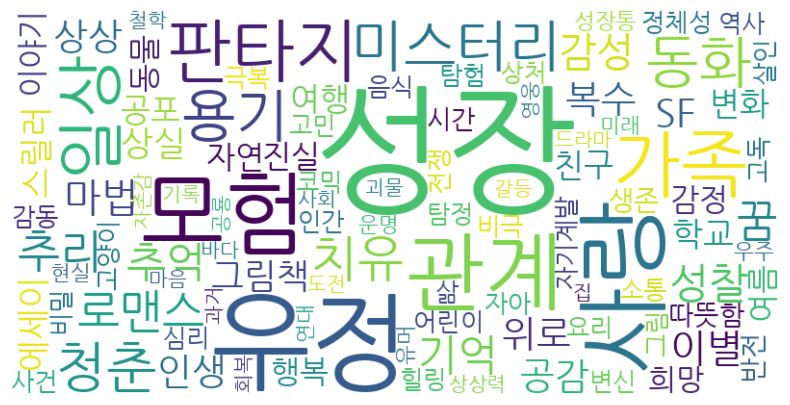

In [26]:
# Install wordcloud library if not already installed
!pip install wordcloud -qq

from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(font_path=font_path, # Use the Korean font
                      background_color='white',
                      width=800,
                      height=400,
                      max_words=100,
                      colormap='viridis').generate_from_frequencies(keyword_counts)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
import matplotlib.pyplot as plt

# Install Korean font
!apt-get update -qq
!apt-get install fonts-nanum -qq

# Reload font manager (this line is no longer needed/valid in newer matplotlib versions)
import matplotlib.font_manager as fm
# fm._rebuild()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
# 대출건수를 반으로 나눔. 상위권과 하위권의 keywords_lists 워드클라우드. 코드작성

# Task
Analyze the keyword trends of top-ranked and bottom-ranked books by dividing the `book` DataFrame based on the median of the '랭킹' column, generating word clouds for each group from the 'keyword_list' column, and providing a summary of the analysis.

## Divide Data by Rank

### Subtask:
'랭킹' 열을 기준으로 `book` DataFrame을 상위권과 하위권으로 나눕니다. 상위권은 랭킹이 낮은 책들을, 하위권은 랭킹이 높은 책들을 포함합니다. 이분할은 랭킹 중앙값을 기준으로 수행됩니다.


**Reasoning**:
First, I'll calculate the median of the '랭킹' column to use as a dividing point. Then, I'll divide the 'book' DataFrame into two new DataFrames: 'top_ranked_books' for books with ranks less than or equal to the median, and 'bottom_ranked_books' for books with ranks greater than the median.



In [28]:
median_rank = book['랭킹'].median()

top_ranked_books = book[book['랭킹'] <= median_rank].copy()
bottom_ranked_books = book[book['랭킹'] > median_rank].copy()

print(f"Median Rank: {median_rank}")
print(f"Number of top-ranked books: {len(top_ranked_books)}")
print(f"Number of bottom-ranked books: {len(bottom_ranked_books)}")

Median Rank: 2506.0
Number of top-ranked books: 1844
Number of bottom-ranked books: 1842


**Reasoning**:
Now that the data is divided, the next step is to prepare the keyword frequency data for word cloud generation for the top-ranked books. This involves flattening the 'keyword_list' column of the `top_ranked_books` DataFrame and then counting the frequency of each keyword.



In [30]:
import collections

# Flatten the list of lists into a single list of all keywords for top-ranked books
top_keywords = [keyword for sublist in top_ranked_books['keyword_list'] for keyword in sublist]

# Count the frequency of each keyword for top-ranked books
top_keyword_counts = collections.Counter(top_keywords)

print("Top 20 most common keywords for top-ranked books:")
for keyword, count in top_keyword_counts.most_common(20):
  print(f"- {keyword}: {count}")

Top 20 most common keywords for top-ranked books:
- 성장: 926
- 우정: 474
- 사랑: 372
- 관계: 318
- 모험: 307
- 가족: 228
- 판타지: 180
- 일상: 178
- 미스터리: 140
- 청춘: 126
- 용기: 115
- 동화: 112
- 치유: 106
- 로맨스: 83
- 기억: 82
- 추리: 80
- 복수: 77
- 꿈: 75
- 성찰: 71
- 추억: 70


**Reasoning**:
Following the analysis of top-ranked books, the next step is to prepare the keyword frequency data for word cloud generation for the bottom-ranked books. This involves flattening the 'keyword_list' column of the `bottom_ranked_books` DataFrame and then counting the frequency of each keyword.



In [31]:
import collections

# Flatten the list of lists into a single list of all keywords for bottom-ranked books
bottom_keywords = [keyword for sublist in bottom_ranked_books['keyword_list'] for keyword in sublist]

# Count the frequency of each keyword for bottom-ranked books
bottom_keyword_counts = collections.Counter(bottom_keywords)

print("Top 20 most common keywords for bottom-ranked books:")
for keyword, count in bottom_keyword_counts.most_common(20):
  print(f"- {keyword}: {count}")

Top 20 most common keywords for bottom-ranked books:
- 성장: 906
- 우정: 471
- 모험: 348
- 사랑: 337
- 관계: 261
- 판타지: 186
- 가족: 183
- 일상: 181
- 용기: 140
- 동화: 130
- 미스터리: 103
- 청춘: 96
- 치유: 78
- 추리: 75
- 로맨스: 71
- 꿈: 64
- 추억: 64
- 성찰: 63
- 감성: 63
- 마법: 60


**Reasoning**:
Now that keyword frequencies have been calculated for both top-ranked and bottom-ranked books, the next step is to generate and display word clouds for each group to visually represent the most common keywords. This will help in comparing the keyword trends between the two ranking groups.



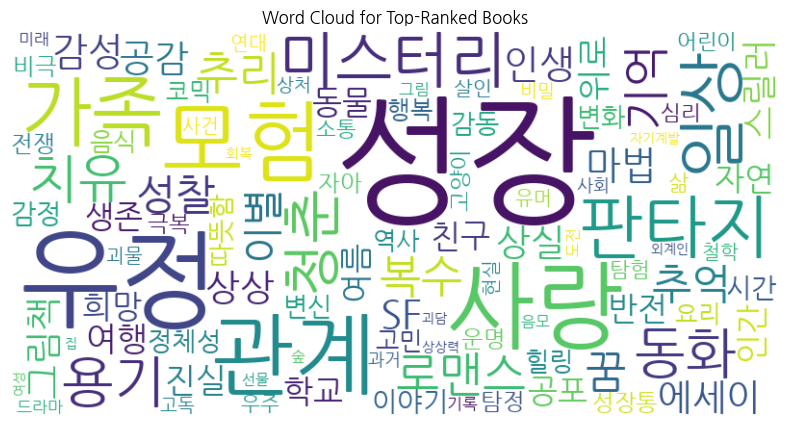

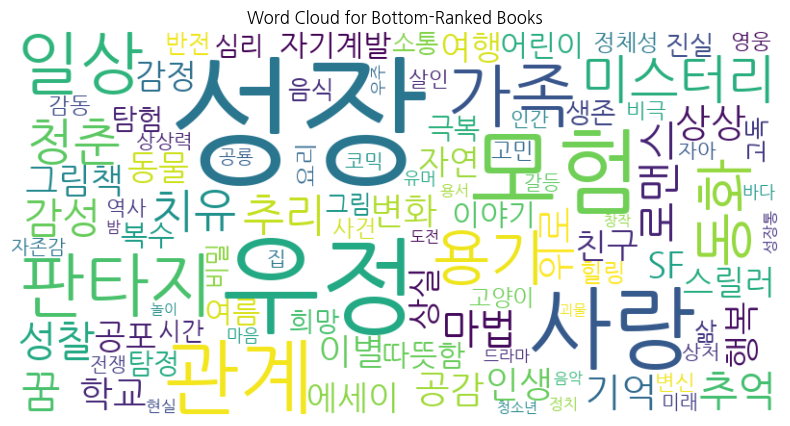

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for top-ranked books
wordcloud_top = WordCloud(font_path=font_path,
                      background_color='white',
                      width=800,
                      height=400,
                      max_words=100,
                      colormap='viridis').generate_from_frequencies(top_keyword_counts)

# Display the word cloud for top-ranked books
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_top, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top-Ranked Books')
plt.show()

# Generate word cloud for bottom-ranked books
wordcloud_bottom = WordCloud(font_path=font_path,
                         background_color='white',
                         width=800,
                         height=400,
                         max_words=100,
                         colormap='viridis').generate_from_frequencies(bottom_keyword_counts)

# Display the word cloud for bottom-ranked books
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bottom, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Bottom-Ranked Books')
plt.show()

## Final Task

### Subtask:
상위권과 하위권의 워드클라우드 분석 결과를 요약하여 제공합니다.


## Summary:

### Q&A
The analysis successfully divided the `book` DataFrame into top-ranked and bottom-ranked groups based on the median rank and then generated word clouds to visualize the keyword trends for each group.

### Data Analysis Key Findings
*   The `book` DataFrame was divided using a median rank of 2506.0, resulting in 1844 top-ranked books (ranking <= median) and 1842 bottom-ranked books (ranking > median).
*   For top-ranked books, the most frequent keywords included '성장' (growth), '우정' (friendship), '사랑' (love), '관계' (relationships), and '모험' (adventure).
*   Similarly, bottom-ranked books also showed high frequencies for '성장', '우정', '모험', '사랑', and '관계', indicating a thematic overlap with top-ranked books in these general categories.
*   Word clouds were successfully generated for both groups, visually representing their respective keyword distributions.

### Insights or Next Steps
*   While common themes like '성장', '우정', '사랑', '관계', and '모험' appear across both top-ranked and bottom-ranked books, a more granular analysis of less common keywords or specific keyword combinations could reveal subtle differences that contribute to a book's ranking.
*   To further differentiate the two groups, investigate the *context* in which these common keywords appear or identify unique keywords that are significantly more prevalent in one group compared to the other.
